In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tqdm import tqdm
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
# !pip install datasets

In [ ]:
# from datasets import load_dataset
# dataset = load_dataset('wmt16', 'de-en')


Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/DL_A3_Q2/dataset.pickle', 'wb') as handle:
#     pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open('/content/drive/MyDrive/DL_A3_Q2/dataset.pickle', 'rb') as handle:
#       dataset = pickle.load(handle)

In [ ]:
# print(len(dataset['train']))
# print(len(dataset['test']))
# print(len(dataset['validation']))
# print(dataset['train'][2000000])

4548885
2999
2169
{'translation': {'de': '1 Liegt größtenteils in Afrika . 2 Liegt zum Teil auch in Ozeanien .', 'en': "(1) Tashkurgan Tajik Autonomous County , officially recognised minority in the People's Republic of China ."}}


In [ ]:
# random_list = [val for val in range(10000)]

In [ ]:
# df = pd.DataFrame(columns = ['German', 'English'])
# for i in tqdm(random_list):
#     sample = dataset['train'][i]['translation']
#     df = df.append({'German':sample['de'], 'English':sample['en']}, ignore_index=True)

# for i in tqdm(range(len(dataset['test']))):
#     sample = dataset['test'][i]['translation']
#     df = df.append({'German':sample['de'], 'English':sample['en']}, ignore_index=True)

# for i in tqdm(range(len(dataset['validation']))):
#     sample = dataset['validation'][i]['translation']
#     df = df.append({'German':sample['de'], 'English':sample['en']}, ignore_index=True)

In [ ]:
# del(dataset)

In [ ]:
# def count_words(s):
#     return len(s.split())

# df['wc_german'] = df['German'].apply(count_words)
# df['wc_english'] = df['English'].apply(count_words)
# avg_german = df['wc_german'].mean()
# print(avg_german)
# avg_english = df['wc_english'].mean()
# print(avg_english)
# df['wc_ratio'] = df['wc_german']/df['wc_english']
# df.head(100)

21.464003164556964
23.39451476793249


,German,English,wc_german,wc_english,wc_ratio
0,Wiederaufnahme der Sitzungsperiode,Resumption of the session,3,4,0.750000
1,"Ich erkläre die am Freitag, dem 17. Dezember u...",I declare resumed the session of the European ...,29,38,0.763158
2,"Wie Sie feststellen konnten, ist der gefürchte...","Although, as you will have seen, the dreaded '...",22,31,0.709677
3,Im Parlament besteht der Wunsch nach einer Aus...,You have requested a debate on this subject in...,16,19,0.842105
4,Heute möchte ich Sie bitten - das ist auch der...,"In the meantime, I should like to observe a mi...",33,40,0.825000
...,...,...,...,...,...
95,Diese Abstimmung ist meiner Erinnerung nach so...,"As I recall, the outcome of this vote was 422 ...",16,17,0.941176
96,"Das heißt, alle Fraktionen, mit Ausnahme der F...",This means that all the Groups with the except...,34,39,0.871795
97,Alle anderen waren anderer Meinung.,All of the others were of a different opinion.,5,9,0.555556
98,Das war der Beschluß.,That was the decision.,4,4,1.000000


In [5]:
# with open('/content/drive/MyDrive/DL_A3_Q2_new/df.pickle', 'wb') as handle:
#     pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('/home/ayush/Courses/DL/A3/DL_A3_Q2_2/df.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [6]:
import collections

words_german = []
words_english = []
for row in range(len(df)):
    words_german.extend(df['German'][row].split())
    words_english.extend(df['English'][row].split())

freq_german = collections.Counter(words_german)
freq_english = collections.Counter(words_english)


In [7]:
freq_german = dict(sorted(freq_german.items(), key=lambda item: item[1], reverse=True))
freq_english = dict(sorted(freq_english.items(), key=lambda item: item[1], reverse=True))


In [8]:
freq_english

{'the': 23754,
 'of': 11840,
 'to': 11501,
 'and': 8960,
 'in': 7722,
 'a': 6272,
 'is': 5295,
 'that': 4761,
 'for': 3837,
 'I': 3318,
 'be': 3088,
 'on': 3061,
 'this': 2801,
 'we': 2580,
 'are': 2430,
 'have': 2337,
 'with': 2281,
 'as': 2260,
 'which': 2224,
 'not': 2184,
 'it': 2170,
 'The': 2006,
 'will': 1802,
 'by': 1664,
 'has': 1615,
 'European': 1386,
 'at': 1383,
 'an': 1288,
 'was': 1250,
 'would': 1166,
 'from': 1153,
 'also': 1085,
 'Mr': 1056,
 '-': 1012,
 'been': 966,
 'but': 963,
 'Commission': 942,
 'should': 919,
 'We': 901,
 'must': 872,
 'all': 825,
 'you': 820,
 'our': 809,
 'more': 793,
 's': 775,
 'their': 775,
 'can': 753,
 'It': 738,
 'or': 723,
 'there': 712,
 'its': 699,
 'In': 687,
 'like': 673,
 'they': 668,
 'This': 660,
 'who': 659,
 'President,': 627,
 'do': 619,
 'one': 609,
 'his': 604,
 'about': 594,
 'these': 570,
 'he': 565,
 'very': 552,
 'new': 546,
 'what': 538,
 'only': 526,
 'my': 522,
 'Parliament': 503,
 'had': 503,
 'up': 502,
 'no': 496,


In [9]:
freq_german

{'die': 11745,
 'der': 11410,
 'und': 8870,
 'in': 5457,
 'zu': 4022,
 'den': 3909,
 'von': 3465,
 'für': 3074,
 'das': 2790,
 'daß': 2650,
 'nicht': 2528,
 'auf': 2400,
 'eine': 2346,
 'des': 2214,
 'wir': 2181,
 'im': 2170,
 'ist': 2102,
 'mit': 2086,
 'es': 1987,
 'ich': 1843,
 'auch': 1739,
 'dem': 1728,
 'sich': 1712,
 'ein': 1614,
 'Die': 1488,
 'als': 1267,
 'sie': 1216,
 'um': 1190,
 'Ich': 1153,
 'wie': 1144,
 'einer': 1139,
 '-': 1108,
 'Kommission': 1104,
 'an': 1085,
 'über': 1051,
 'Sie': 966,
 'bei': 950,
 'zur': 947,
 'werden': 908,
 'einen': 842,
 'nach': 839,
 'diese': 819,
 'dass': 819,
 'Herr': 813,
 'aber': 783,
 'sind': 770,
 'Wir': 751,
 'wird': 722,
 'uns': 721,
 'Das': 715,
 'hat': 712,
 'einem': 704,
 'noch': 700,
 'haben': 691,
 'er': 676,
 'nur': 660,
 'so': 652,
 'Es': 650,
 'dieser': 647,
 'aus': 643,
 'vor': 639,
 'wenn': 633,
 'zum': 632,
 'am': 611,
 'oder': 596,
 'diesem': 590,
 'möchte': 588,
 'Union': 568,
 'Europäischen': 549,
 'Parlament': 545,
 'De

In [ ]:
mean_token_german = 0
mean_token_english = 0

for key, value in freq_german.items():
    mean_token_german += len(key)*value
mean_token_german /=sum(freq_german.values())
print(mean_token_german)

for key, value in freq_english.items():
    mean_token_english += len(key)*value
mean_token_english /=sum(freq_english.values())
print(mean_token_english)



6.155274199394285
4.96319832717107


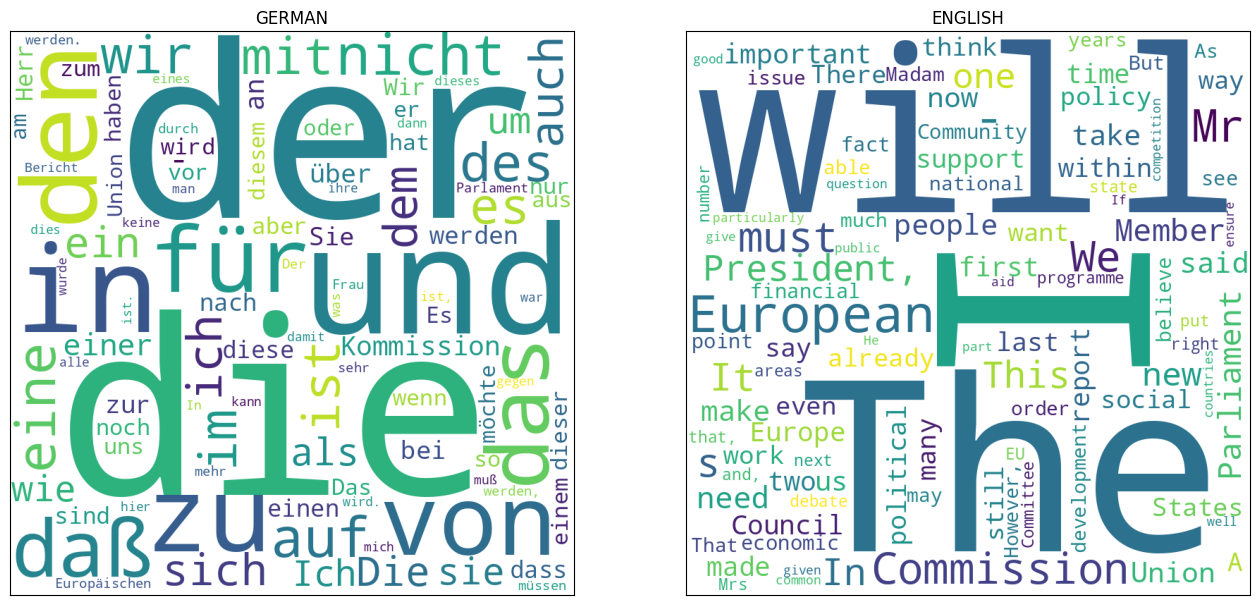

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width=800, height=800, background_color='white', max_words=100, min_font_size=5)
wordcloud1.generate_from_frequencies(freq_german)

freq_english_no_stopwords = {key: value for key, value in freq_english.items() if key not in set(STOPWORDS)}

wordcloud2 = WordCloud(width=800, stopwords = set(STOPWORDS), height=800, background_color='white', max_words=100, min_font_size=5)
wordcloud2.generate_from_frequencies(freq_english_no_stopwords)

fig, axs = plt.subplots(1, 2, figsize=(16,16))
axs[0].imshow(wordcloud1)
axs[0].set_title('GERMAN')

axs[1].imshow(wordcloud2)
axs[1].set_title('ENGLISH')

axs[0].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
axs[1].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.show()


In [6]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)


In [ ]:
def preprocess_text(text):
    # Remove punctuation using the string library
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase the text
    text = text.lower()
    return text


In [ ]:
df['German'] = df['German'].apply(preprocess_text)
df['English'] = df['English'].apply(preprocess_text)


df.head(100)

,German,English,wc_german,wc_english,wc_ratio
0,wiederaufnahme der sitzungsperiode,resumption of the session,3,4,0.750000
1,ich erkläre die am freitag dem 17 dezember unterbrochene sitzungsperiode des europäischen parlaments für wiederaufgenommen wünsche ihnen nochmals alles gute zum jahreswechsel und hoffe daß sie sch...,i declare resumed the session of the european parliament adjourned on friday 17 december 1999 and i would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festi...,29,38,0.763158
2,wie sie feststellen konnten ist der gefürchtete milleniumbug nicht eingetreten doch sind bürger einiger unserer mitgliedstaaten opfer von schrecklichen naturkatastrophen geworden,although as you will have seen the dreaded millennium bug failed to materialise still the people in a number of countries suffered a series of natural disasters that truly were dreadful,22,31,0.709677
3,im parlament besteht der wunsch nach einer aussprache im verlauf dieser sitzungsperiode in den nächsten tagen,you have requested a debate on this subject in the course of the next few days during this partsession,16,19,0.842105
4,heute möchte ich sie bitten das ist auch der wunsch einiger kolleginnen und kollegen allen opfern der stürme insbesondere in den verschiedenen ländern der europäischen union in einer schweigemin...,in the meantime i should like to observe a minute s silence as a number of members have requested on behalf of all the victims concerned particularly those of the terrible storms in the various co...,33,40,0.825000
...,...,...,...,...,...
95,diese abstimmung ist meiner erinnerung nach so ausgegangen 422 gegen 180 stimmen bei einigen wenigen enthaltungen,as i recall the outcome of this vote was 422 votes to 180 with a few abstentions,16,17,0.941176
96,das heißt alle fraktionen mit ausnahme der fraktionslosen aber die sind ja keine fraktion waren sich einig nur ihre fraktion war der meinung so zu verfahren wie sie es hier vorgeschlagen haben,this means that all the groups with the exception of the nonattached members but of course they are not a group were in agreement only your group thought that we should proceed as you have propo...,34,39,0.871795
97,alle anderen waren anderer meinung,all of the others were of a different opinion,5,9,0.555556
98,das war der beschluß,that was the decision,4,4,1.000000


Text to sequence conversion

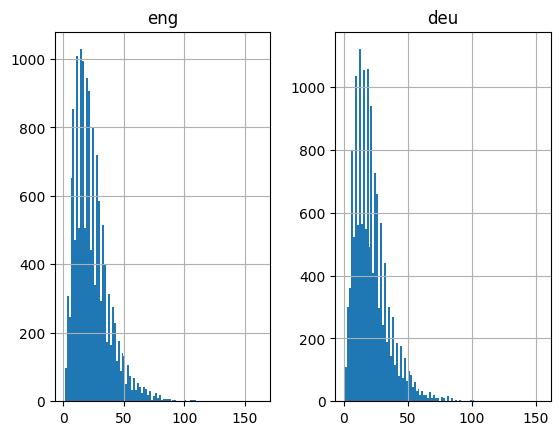

In [ ]:
# visualize length of sentences

eng_sent_length = df['wc_english']
deu_sent_length = df['wc_german']

length_df = pd.DataFrame({'eng':eng_sent_length, 'deu': deu_sent_length})
length_df.hist(bins = 100)
# plt.xlim(0,110)
plt.show()

In [5]:
#build tokenizer for both eng, deu sentences
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

eng_tokenizer = tokenization(df['English'])
eng_vocab_size = len(eng_tokenizer.word_index) + 1


deu_tokenizer = tokenization(df['German'])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

print('English Vocabulary Size: %d' % eng_vocab_size)
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

English Vocabulary Size: 18215
Deutch Vocabulary Size: 30816


In [ ]:
# print('max sent_length eng:', max(eng_sent_length))
# print('max sent_length deu:', max(deu_sent_length))

max sent_length eng: 163
max sent_length deu: 154


In [ ]:
# percentile = np.percentile(eng_sent_length, 95)
# eng_max_length = max([x for x in eng_sent_length if x < percentile])

# percentile = np.percentile(deu_sent_length, 95)
# deu_max_length = max([x for x in deu_sent_length if x < percentile])

# print(eng_max_length)
# print(deu_max_length)

50
46


In [ ]:
# In machine translation, the maximum sequence length used for encoding text samples is typically chosen based on the distribution of sentence lengths in the training data.

# One common approach is to set the maximum sequence length to the 95th or 99th percentile of the sentence lengths in the training data. This ensures that the vast majority of sentences are not truncated, while also allowing for a manageable sequence length that can be efficiently processed by the model.

# The maximum sequence length can be different for the source and target languages, depending on the distribution of sentence lengths in each language. In some cases, the maximum sequence length for the target language may be shorter than the maximum sequence length for the source language, especially if the target language has shorter sentences on average.

# It's also worth noting that padding sequences to a fixed length can introduce additional computation overhead, especially for very long sequences. One common technique to mitigate this is to use "attention mechanisms", which allow the model to focus on the most relevant parts of the input sequence while ignoring the rest. This can reduce the amount of padding required and improve the overall efficiency and accuracy of the model.

In [ ]:
# #encode and pad sequences

# def encode_sequences(tokenizer, length, lines):
#     #integer encode sequences
#     seq = tokenizer.texts_to_sequences(lines)
#     #pad sequences with 0 values
#     seq = pad_sequences(seq, maxlen = length, padding = 'post')
#     return seq

In [ ]:
#prepare encoded data
# X = encode_sequences(eng_tokenizer, eng_max_length, df['English'])
# Y = encode_sequences(deu_tokenizer, deu_max_length, df['German'])

In [ ]:
# with open('/content/drive/MyDrive/DL_A3_Q2/X.pickle', 'wb') as handle:
#     pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/MyDrive/DL_A3_Q2/Y.pickle', 'wb') as handle:
#     pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
with open('/content/drive/MyDrive/DL_A3_Q2_new/X.pickle', 'rb') as handle:
    X = pickle.load(handle)

In [7]:
with open('/content/drive/MyDrive/DL_A3_Q2_new/Y.pickle', 'rb') as handle:
    Y = pickle.load(handle)

In [23]:
X

array([[   38, 15395,   316, ...,     0,     0,     0],
       [   12, 40229,     7, ...,     0,     0,     0],
       [   10,     1,  1739, ...,     0,     0,     0],
       ...,
       [  686,   394,   554, ...,     0,     0,     0],
       [15595, 14525,  2361, ...,     0,     0,     0],
       [  220,   126,    68, ...,     0,     0,     0]], dtype=int32)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X_unscaled)
# Y = scaler.fit_transform(Y_unscaled)


In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !unnzip glove.6B.zip

In [ ]:
embeddings_index = {}
f = open('./glove.6B/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#construct the embedding matrix using the embedding index dictionary and the word index created previously
max_words = tot_eng_tokens - 1
embedding_matrix = np.zeros((tot_eng_tokens, 50))
for i, word in enumerate(list(eng_tokenizer)):
    if i > max_words:
        continue
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [8]:
validationX = X[-2169:]
testX= X[-(2169+2999):-2169]
trainX = X[:-(2169+2999)]

validationY = Y[-2169:]
testY= Y[-(2169+2999):-2169]
trainY = Y[:-(2169+2999)]


In [9]:
print(trainX.shape)
print(testX.shape)
print(validationX.shape)
print(trainY.shape)
print(testY.shape)
print(validationY.shape)

(10000, 50)
(2999, 50)
(2169, 50)
(10000, 46)
(2999, 46)
(2169, 46)


In [7]:
eng_vocab_size = 18698
deu_vocab_size = 31653
eng_max_length = 50
deu_max_length = 46


In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
trainX = tf.convert_to_tensor(trainX)
testX = tf.convert_to_tensor(testX)
validationX = tf.convert_to_tensor(validationX)
trainY = tf.convert_to_tensor(trainY)
testY = tf.convert_to_tensor(testY)
validationY = tf.convert_to_tensor(validationY)

In [13]:
print(np.isnan(trainX))
print(np.isnan(trainY))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [14]:
trainY

<tf.Tensor: shape=(10000, 46), dtype=int32, numpy=
array([[2750,    2, 2228, ...,    0,    0,    0],
       [  10, 4504,    1, ...,    0,    0,    0],
       [  29,   19, 1033, ...,    0,    0,    0],
       ...,
       [  78,  144,   23, ...,    0,    0,    0],
       [   1, 3811,   20, ...,    0,    0,    0],
       [  11,  137,   19, ...,    0,    0,    0]], dtype=int32)>

In [15]:
trainX

<tf.Tensor: shape=(10000, 50), dtype=int32, numpy=
array([[3867,    2,    1, ...,    0,    0,    0],
       [  12, 2526, 3284, ...,    0,    0,    0],
       [ 383,   16,   35, ...,    0,    0,    0],
       ...,
       [  10,   32,  477, ...,    0,    0,    0],
       [   1, 1002,  188, ...,    0,    0,    0],
       [  11,   93,   40, ...,    0,    0,    0]], dtype=int32)>

In [20]:
def build_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length = in_timesteps, weights=[embedding_matrix], trainable = True, mask_zero = True))

    model.add(LSTM(units))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences = True))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Dense(out_vocab, activation = 'softmax'))
    return model



with tf.device('/GPU:0'):
    model_A = build_model(eng_vocab_size, deu_vocab_size, eng_max_length, deu_max_length, 512 )
# rms = optimizers.RMSprop(lr = 0.001)
optimizer = optimizers.RMSprop(learning_rate=0.001)
model_A.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy')

In [18]:
print(model_A.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 512)           9573376   
                                                                 
 lstm_8 (LSTM)               (None, 512)               2099200   
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 repeat_vector_4 (RepeatVect  (None, 46, 512)          0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 46, 512)           2099200   
                                                                 
 batch_normalization_9 (Batc  (None, 46, 512)         

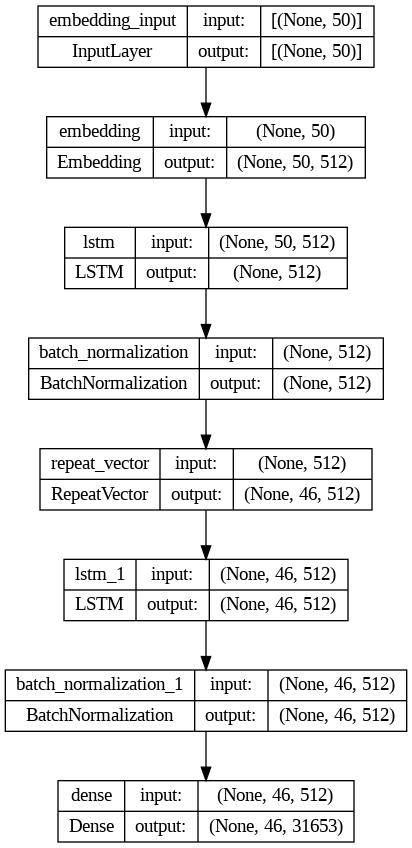

In [43]:
from keras.utils import plot_model
plot_model(model_A, to_file = " model_A.png", show_shapes = True, show_layer_names = True )

In [37]:
filename = 'model_A'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

with tf.device('/GPU:0'):
    history = model_A.fit(trainX, trainY, 
            epochs=20, batch_size=32,
            validation_data=(validationX, validationY), 
            callbacks=[checkpoint], verbose=1)

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 4.9347
Epoch 1: val_loss improved from inf to 4.00071, saving model to model_A


313/313 [==============================] - 46s 146ms/step - loss: 4.9347 - val_loss: 4.0007
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 3.7308
Epoch 2: val_loss improved from 4.00071 to 3.68494, saving model to model_A


313/313 [==============================] - 44s 142ms/step - loss: 3.7307 - val_loss: 3.6849
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 3.6260
Epoch 3: val_loss improved from 3.68494 to 3.55235, saving model to model_A


313/313 [==============================] - 42s 134ms/step - loss: 3.6265 - val_loss: 3.5523
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 3.5498
Epoch 4: val_loss did not improve from 3.55235
313/313 [==============================] - 27s 87ms/step - loss: 3.5514 - val_loss: 4.5013
Epoch 5/20
312/313 [============================>.] - ETA: 0s - loss: 3.4921
Epoch 5: val_loss did not improve from 3.55235
313/313 [==============================] - 28s 89ms/step - loss: 3.4940 - val_loss: 3.6103
Epoch 6/20
312/313 [============================>.] - ETA: 0s - loss: 3.4310
Epoch 6: val_loss improved from 3.55235 to 3.51195, saving model to model_A


313/313 [==============================] - 43s 138ms/step - loss: 3.4308 - val_loss: 3.5119
Epoch 7/20
313/313 [==============================] - ETA: 0s - loss: 3.3722
Epoch 7: val_loss improved from 3.51195 to 3.46639, saving model to model_A


313/313 [==============================] - 42s 134ms/step - loss: 3.3722 - val_loss: 3.4664
Epoch 8/20
313/313 [==============================] - ETA: 0s - loss: 3.3140
Epoch 8: val_loss did not improve from 3.46639
313/313 [==============================] - 28s 89ms/step - loss: 3.3140 - val_loss: 3.7801
Epoch 9/20
312/313 [============================>.] - ETA: 0s - loss: 3.2625
Epoch 9: val_loss did not improve from 3.46639
313/313 [==============================] - 28s 90ms/step - loss: 3.2617 - val_loss: 3.4740
Epoch 10/20
313/313 [==============================] - ETA: 0s - loss: 3.2009
Epoch 10: val_loss improved from 3.46639 to 3.39380, saving model to model_A


313/313 [==============================] - 42s 136ms/step - loss: 3.2009 - val_loss: 3.3938
Epoch 11/20
313/313 [==============================] - ETA: 0s - loss: 3.1358
Epoch 11: val_loss did not improve from 3.39380
313/313 [==============================] - 28s 90ms/step - loss: 3.1358 - val_loss: 3.5182
Epoch 12/20
313/313 [==============================] - ETA: 0s - loss: 3.0649
Epoch 12: val_loss did not improve from 3.39380
313/313 [==============================] - 28s 90ms/step - loss: 3.0649 - val_loss: 3.5480
Epoch 13/20
313/313 [==============================] - ETA: 0s - loss: 2.9977
Epoch 13: val_loss did not improve from 3.39380
313/313 [==============================] - 28s 91ms/step - loss: 2.9977 - val_loss: 3.4972
Epoch 14/20
313/313 [==============================] - ETA: 0s - loss: 2.9303
Epoch 14: val_loss did not improve from 3.39380
313/313 [==============================] - 28s 91ms/step - loss: 2.9303 - val_loss: 3.4754
Epoch 15/20
313/313 [===================

In [38]:
model_A.save('/content/drive/MyDrive/DL_A3_Q2_new/model_A')

In [39]:
!zip -r 'model_A.zip' '/content/drive/MyDrive/DL_A3_Q2_new/model_A'

  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/ (stored 0%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/variables/ (stored 0%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/variables/variables.index (deflated 67%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/assets/ (stored 0%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/fingerprint.pb (stored 0%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/saved_model.pb (deflated 90%)
  adding: content/drive/MyDrive/DL_A3_Q2_new/model_A/keras_metadata.pb (deflated 91%)


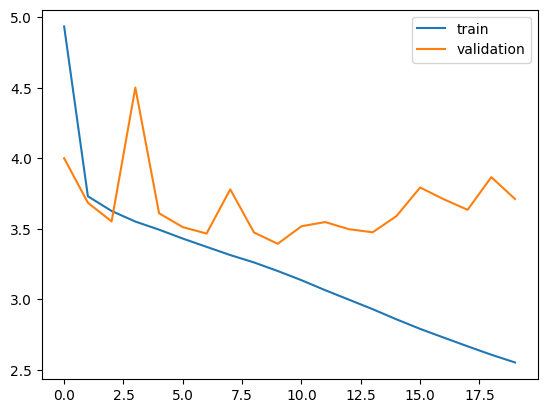

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [41]:
print(history.history['loss'])
print(history.history['val_loss'])


[4.934729099273682, 3.7306621074676514, 3.626518726348877, 3.5514066219329834, 3.49401593208313, 3.430800676345825, 3.3722476959228516, 3.3139617443084717, 3.261669397354126, 3.200932502746582, 3.135791540145874, 3.064865827560425, 2.99774169921875, 2.930264711380005, 2.8584787845611572, 2.7904858589172363, 2.7284579277038574, 2.667050361633301, 2.607351064682007, 2.552337884902954]
[4.000711441040039, 3.6849372386932373, 3.5523476600646973, 4.501264572143555, 3.6102685928344727, 3.5119495391845703, 3.466392755508423, 3.780059576034546, 3.474026918411255, 3.3938045501708984, 3.5181984901428223, 3.548011541366577, 3.4972105026245117, 3.475438117980957, 3.5897812843322754, 3.792936325073242, 3.7094480991363525, 3.634852170944214, 3.866342306137085, 3.71127986907959]


In [49]:
from numba import cuda
# device = cuda.get_current_device()
cuda.select_device(0)
cuda.close()


In TensorFlow, a checkpoint file contains the value of (some of) the variables in a TensorFlow model1. It is created by a Saver, which is either given specific Variables to save or by default saves all (non-local) Variables1. To use a checkpoint, you need to have a compatible TensorFlow Graph whose Variables have the same names as the Variables in the checkpoint1.

On the other hand, SavedModel format includes a serialized description of the computation defined by the model in addition to the parameter values (checkpoint)2. Models in this format are independent of the source code that created the model2.

In [ ]:
!unzip /content/drive/MyDrive/DL_A3_Q2/model_A.zip

Archive:  /content/drive/MyDrive/DL_A3_Q2/model_A_0.zip
replace content/model_A/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: model_A_0
error:  invalid response [model_A_0]
replace content/model_A/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace content/model_A/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: model_A_0
error:  invalid response [model_A_0]
replace content/model_A/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace content/model_A/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [18]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
      

In [19]:
model = load_model('/content/drive/MyDrive/DL_A3_Q2_new/model_A')
import numpy as np


In [20]:
predictions = np.argmax(model_A.predict(testX[:299].reshape((testX[:299].shape[0], testX[:299].shape[1]))), axis=-1)

10/10 [==============================] - 3s 32ms/step


In [21]:
predictions[7]


array([16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605,
       16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605,
       16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605,
       16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605,
       16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605, 16605,
       16605])

In [22]:
print(predictions.shape)
print(testY.shape)

(299, 46)
(2999, 46)


In [29]:
deu_dict = {}
for word, index in deu_tokenizer.word_index.items():
  deu_dict[index] = word

In [30]:
deu_dict

{1: 'die',
 2: 'der',
 3: 'und',
 4: 'in',
 5: 'zu',
 6: 'den',
 7: 'das',
 8: 'von',
 9: 'für',
 10: 'ich',
 11: 'wir',
 12: 'ist',
 13: 'nicht',
 14: 'es',
 15: 'daß',
 16: 'auf',
 17: 'eine',
 18: 'im',
 19: 'sie',
 20: 'mit',
 21: 'des',
 22: 'werden',
 23: 'auch',
 24: 'ein',
 25: 'dem',
 26: 'sich',
 27: 'als',
 28: 'wird',
 29: 'wie',
 30: 'an',
 31: 'sind',
 32: 'kommission',
 33: 'um',
 34: 'hat',
 35: 'haben',
 36: 'einer',
 37: 'über',
 38: 'bei',
 39: 'aber',
 40: 'nach',
 41: 'diese',
 42: 'zur',
 43: 'er',
 44: 'wenn',
 45: 'europäischen',
 46: 'einen',
 47: 'vor',
 48: 'dass',
 49: 'herr',
 50: 'aus',
 51: 'so',
 52: 'uns',
 53: 'noch',
 54: 'nur',
 55: 'dieser',
 56: 'einem',
 57: 'zum',
 58: 'müssen',
 59: 'am',
 60: 'union',
 61: 'kann',
 62: 'möchte',
 63: 'können',
 64: 'was',
 65: 'sein',
 66: 'oder',
 67: 'diesem',
 68: 'parlament',
 69: 'wurde',
 70: 'durch',
 71: 'muß',
 72: 'war',
 73: 'mehr',
 74: 'ihre',
 75: 'sehr',
 76: 'frau',
 77: 'man',
 78: 'dies',
 79:

In [23]:
testY_subsample = testY[:299]
testY_subsample = testY_subsample.numpy()

In [24]:
print(type(predictions))
print(type(testY_subsample))
print(predictions.shape)
print(testY_subsample.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(299, 46)
(299, 46)


In [25]:
testY_subsample

array([[ 3575, 22678,  5835, ...,     0,     0,     0],
       [    7,  1350,   104, ...,     0,     0,     0],
       [    1,   311,  1418, ...,     0,     0,     0],
       ...,
       [   39,    24,  1464, ...,     0,     0,     0],
       [  436,    24,  5770, ...,     0,     0,     0],
       [    2,   349, 23217, ...,     0,     0,     0]], dtype=int32)

In [26]:
predictions

array([[24063, 24063, 24063, ..., 23852, 23852, 23852],
       [15869, 15869, 15869, ..., 23500, 23500, 23500],
       [21905, 21905, 31266, ..., 31266, 31266, 31266],
       ...,
       [ 2036,  2036, 27310, ..., 28293, 28293, 28293],
       [30440, 30440, 30440, ..., 13056, 13056, 13056],
       [26396, 17286, 17286, ..., 17286, 17286, 17286]])

In [27]:
def convert_token_ids_to_tokens(input_array, token_dict):
    output_array = []
    for row in input_array:
        output_row = [token_dict.get(token_id, "<UNK>") for token_id in row]
        output_array.append(output_row)
    return np.array(output_array)

In [31]:
y_true = convert_token_ids_to_tokens(testY_subsample, deu_dict)
y_pred = convert_token_ids_to_tokens(predictions, deu_dict)


In [32]:
y_true

array([['vertritt', 'christie', 'fünfte', ..., '<UNK>', '<UNK>', '<UNK>'],
       ['das', 'inzwischen', 'zwischen', ..., '<UNK>', '<UNK>', '<UNK>'],
       ['die', 'welt', 'tod', ..., '<UNK>', '<UNK>', '<UNK>'],
       ...,
       ['aber', 'ein', 'instanz', ..., '<UNK>', '<UNK>', '<UNK>'],
       ['kommissarin', 'ein', 'zeilen', ..., '<UNK>', '<UNK>', '<UNK>'],
       ['der', 'präsidentschaft', 'rundherum', ..., '<UNK>', '<UNK>',
        '<UNK>']], dtype='<U29')

In [33]:
y_pred 

array([['defence', 'defence', 'defence', ..., 'genialen', 'genialen',
        'genialen'],
       ['egks\xadvertrages', 'egks\xadvertrages', 'egks\xadvertrages',
        ..., 'ordneten', 'ordneten', 'ordneten'],
       ['ausgeliefertseins', 'ausgeliefertseins', '<UNK>', ..., '<UNK>',
        '<UNK>', '<UNK>'],
       ...,
       ['australia', 'australia', 'einlösten', ..., 'berkeleys',
        'berkeleys', 'berkeleys'],
       ['aufbegehrende', 'aufbegehrende', 'aufbegehrende', ..., 'jc',
        'jc', 'jc'],
       ['geschick', 'gefürchtet', 'gefürchtet', ..., 'gefürchtet',
        'gefürchtet', 'gefürchtet']], dtype='<U24')

In [34]:
y_true[5]

array(['marktes', 'ergänzen', 'den', 'beweglichkeit', 'vergewaltiger',
       'zurückkommen', 'und', 'legislative', 'fünfte', 'einstimmigkeit',
       'hält', 'sollen', 'bombastische', 'vor', '<UNK>', '<UNK>', '<UNK>',
       '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>',
       '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>',
       '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>',
       '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>', '<UNK>',
       '<UNK>'], dtype='<U29')

In [35]:
y_pred[5]

array(['industriemäßigen', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag', 'antrag',
       'antrag', 'antrag', 'antrag', 'antrag', 'antrag'], dtype='<U24')

In [36]:
Y_TRUE = []
Y_PRED = []


for row in y_true:
  list = " ".join(row)
  Y_TRUE.append(list)

for row in y_pred:
  list = " ".join(row)
  Y_PRED.append(list)

In [37]:
!pip install evaluate
import evaluate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 7.0 MB/s eta 0:00:00


In [38]:
!pip install rouge_score
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=bdbd932b0e001ce3f84c51d529c995ddcadc39a5ba77e3b6b0afbc72508f5ca8
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge_score


In [40]:
results_rouge = rouge.compute(predictions=Y_PRED, references = Y_TRUE)
results_bleu = bleu.compute(predictions=Y_PRED, references = Y_TRUE)
print(results_rouge)
print(results_bleu)

{'rouge1': 0.011106066672920323, 'rouge2': 0.009417396269190297, 'rougeL': 0.010887039580717075, 'rougeLsum': 0.010593346390303016}
{'bleu': 0.009738656621046794, 'precisions': [0.031673891763389736, 0.03127901164036278, 0.03086690017513135, 0.030436404326743754], 'brevity_penalty': 0.313537037191609, 'length_ratio': 0.46299773389446425, 'translation_length': 14302, 'reference_length': 30890}


In [53]:
from nltk.translate.bleu_score import corpus_bleu
score = corpus_bleu(Y_TRUE, Y_PRED, weights = (1,0,0,0))
print("bleu-1 :", score)
score = corpus_bleu(Y_TRUE, Y_PRED, weights = (0.5,0.5,0,0))
print("bleu-2 :", score)

bleu-1 : 0.02353076804836809
bleu-2 : 2.2881804311509015e-155
